<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%201/Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

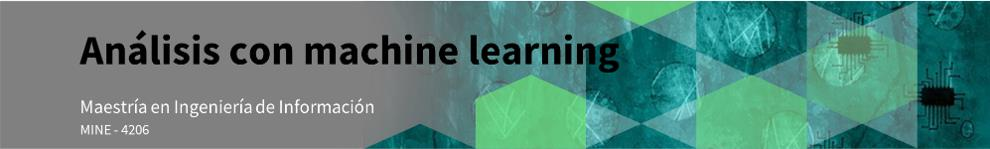

- **Integrante 1:** Santiago Martínez Novoa - 202112020
- **Integrante 2:**

---
# Contexto y objetivos.

En el sector hotelero, la cancelación de reservas es un problema significativo que puede tener un impacto negativo en la rentabilidad y la gestión de recursos de un hotel. Las cancelaciones pueden deberse a una variedad de razones, como cambios en los planes de viaje, emergencias personales o simplemente una mejor oferta encontrada en otro lugar. Para los hoteles, esto puede resultar en habitaciones vacías que podrían haber sido vendidas a otros clientes, lo que lleva a una pérdida de ingresos y a una subutilización de recursos como personal, limpieza y mantenimiento.

Además, la cancelación de reservas puede afectar la capacidad del hotel para planificar y gestionar adecuadamente su inventario de habitaciones. Por ejemplo, si un hotel espera que una cierta cantidad de habitaciones estén ocupadas en una fecha determinada y luego se cancelan muchas reservas, el hotel puede encontrarse con un exceso de disponibilidad de habitaciones que podría haberse asignado de manera más eficiente.

El objetivo principal es desarrollar un modelo predictivo capaz de determinar si una reserva será cancelada o no. Esto permitirá al hotel tomar medidas proactivas, como ofrecer incentivos a los clientes para que no cancelen sus reservas, o gestionar de manera más eficiente la disponibilidad de habitaciones.

Por lo tanto, para poder tomar decisiones en este estudio, se debe presentar:



**Objetivos de desarrollo**:
* Aplicar técnicas de clasificación para construir diferentes modelos predictivos que permitan estimar las cancelaciones del hotel siguiendo el ciclo de machine learning.
* Determinar cuáles son los factores que más inciden en la demanda con base en los datos.

**Datos**: Información obtenida de [hotel-booking-cancellation-prediction](https://www.kaggle.com/datasets/youssefaboelwafa/hotel-booking-cancellation-prediction).

# Entendimiento del negocio.

El conjunto de datos recoge información acerca de reservas de hoteles. Tanto la cantidad de personas en la reserva, número de noches, tipo de habitación, precio promedio, etc... Es importante que revises el diccionario como primer paso para comprender estos datos.


Con apoyo de la organización ha sido posible elaborar el siguiente diccionario de datos:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **Booking_ID** | Identificador único para cada reservación. |
| **number of adults** | Cantidad de adultos incluídos en la reservación. |
| **number if children** | Cantidad de niños incluídos en la reservación. |
| **number of weekend nights** | Número de noches de fin de semana incluídas en la reserva. |
| **number of week nights** | Número de noches entre semana incluídas en la reserva. |
| **type of meal** | Tipo de comida incluída en la reserva. |
| **car parking space** | Indica si se pidió o si se incluía un espacio de parqueadero. |
| **room type** | Tipo de habitación en la reserva. |
| **lead time** | Número de días entre el dia que se realizó la resrerva y el día de reserva. |
| **market segment type** | Tipo de mercado asociado en la reserva. |
| **repeated** | Indica si la reserva es una reserva repetida. |
| **P-C** | Número de reservas canceladas por el usuario antes de la reserva actual. |
| **P-not-C** | Número de reservas cumplidas por el usuario antes de la reserva actual. |
| **average price** | Precio promedio asociado a la reserva. |
| **special request** | Cantidad de peticiones especiales hechas por el usuario. |
| **date of reservation** | Fecha de la reserva. |
| **booking status** | Estado de la reserva (cancelada o no cancelada). |







# Actividades a realizar.

1. Explorar y perfilar los datos utilizando las funciones de la libreria pandas. Recuerda que este paso es muy importante para determinar problemas de calidad (*por ejemplo, valores ausentes y registros duplicados*). Documentar hallazgos (insights) importantes para el negocio.

2. Limpiar y preparar los datos. Justifica las decisiones tomadas basada en la exploración de datos del punto anterior.

3. Realiza el modelamiento de datos en pipelines los algoritmos: Regresión Logística, Support Vector Machine (SVM), Random Forest y Adaboosting. Para cada uno de ellos realiza la busqueda de hiperparámetros y justifica la métrica que vas a usar para el ranking de los modelos.

4. Implementa gráficas que permitan ayudar a interpretar cada una de las clases en cada uno de los modelos.

5. Genera una tabla comparativa e interpreta las métricas de los algoritmos del punto anterior. Al comparar los resultados de los diferentes algoritmos, ¿cuál es el mejor modelo segun el objetivo del negocio y por qué?

**NOTA**: La calificación será sobre notebook ejecutado y cargado en Bloque Neón junto con el archivo HTML.

# Actividades de preparación

## Importación de librerías

In [1]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.svm import SVC

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Librerías extras
import itertools

from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")

La versión de sklearn es: 1.4.1.post1


## Carga de los datos

In [5]:
#Cargar los datos del csv ubicado en ./Data/booking.csv
data = pd.read_csv("./Data/booking.csv")

#Mostrar los primeros 5 registros
data.columns

#Para evitar algun tipo de error por espacios en los nombres de las columnas 
# se decide reemplazar todos los espacios por _
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

data.head()


Booking_ID  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  P-C  P-not-C  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests date_of_reservation booking_status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

# Separación de la información

## Entrenamientos y test

Cómo el hotel quiere poder predecir que reservas van a ser canceladas y cuales no, se define la variable objetivo

In [ ]:
target_feature = 'booking_status'

Se separan los datos de entrenamiento y test en una proporción 80% / 20%, además de definir una semilla.

In [10]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

Booking_ID  number_of_adults  number_of_children  \
387     INN00388                 3                   0   
7768    INN07769                 1                   0   
11792   INN11793                 2                   0   
7978    INN07979                 1                   0   
10670   INN10671                 2                   2   

       number_of_weekend_nights  number_of_week_nights type_of_meal  \
387                           1                      3  Meal Plan 1   
7768                          2                      2  Meal Plan 1   
11792                         1                      2  Meal Plan 1   
7978                          0                      2  Meal Plan 1   
10670                         1                      2  Meal Plan 1   

       car_parking_space    room_type  lead_time market_segment_type  \
387                    0  Room_Type 4        155              Online   
7768                   0  Room_Type 4         48              Online   
11792                  0  Room_Type 1        305             Offline   
7978                   0  Room_Type 1        102              Online   
10670                  0  Room_Type 6          9              Online   

       repeated  P-C  P-not-C  average_price  special_requests  \
387           0    0        0          115.6                 1   
7768          0    0        0          149.4                 0   
11792         0    0        0           89.0                 0   
7978          0    0        0           86.4                 2   
10670         0    0        0          221.0                 0   

      date_of_reservation booking_status  
387            12/26/2018       Canceled  
7768            9/18/2018       Canceled  
11792           11/4/2018       Canceled  
7978            12/6/2018       Canceled  
10670           6/10/2018       Canceled

A continuación la distribución de los datos tras las separación de la información.

In [11]:
train_count = train.shape[0]
test_count = test.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 29,028
-> Test: 7,257


# Entendimiento de los datos

## Exploración general de los datos

En primer lugar hay que realizar una exploración y un entendimiento de las columnas que posee el dataset, mediante el diccionario provisto por el negocio.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29028 entries, 387 to 15795
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                29028 non-null  object 
 1   number_of_adults          29028 non-null  int64  
 2   number_of_children        29028 non-null  int64  
 3   number_of_weekend_nights  29028 non-null  int64  
 4   number_of_week_nights     29028 non-null  int64  
 5   type_of_meal              29028 non-null  object 
 6   car_parking_space         29028 non-null  int64  
 7   room_type                 29028 non-null  object 
 8   lead_time                 29028 non-null  int64  
 9   market_segment_type       29028 non-null  object 
 10  repeated                  29028 non-null  int64  
 11  P-C                       29028 non-null  int64  
 12  P-not-C                   29028 non-null  int64  
 13  average_price             29028 non-null  float64
 14  special_r

In [13]:
train.describe()

number_of_adults  number_of_children  number_of_weekend_nights  \
count      29028.000000        29028.000000              29028.000000   
mean           1.843599            0.107310                  0.809322   
std            0.516978            0.408539                  0.867046   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number_of_week_nights  car_parking_space     lead_time      repeated  \
count           29028.000000       29028.000000  29028.000000  29028.000000   
mean                2.204837           0.031383     85.284932      0.024873   
std                 1.394614           0.174355     85.799224      0.155739   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    127.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average_price  special_requests  
count  29028.000000  29028.000000   29028.000000      29028.000000  
mean       0.022633      0.150992     103.438113          0.618644  
std        0.355679      1.764273      35.148630          0.785510  
min        0.000000      0.000000       0.000000          0.000000  
25%        0.000000      0.000000      80.407500          0.000000  
50%        0.000000      0.000000      99.450000          0.000000  
75%        0.000000      0.000000     120.000000          1.000000  
max       13.000000     57.000000     540.000000          5.000000

In [14]:
print(f"El número de atributos es: {train.shape[1]} y el número de instancias es: {train.shape[0]}")

El número de atributos es: 17 y el número de instancias es: 29028


In [15]:
print("Total de registros duplicados iniciales: ",train.duplicated(keep = False).sum())

Total de registros duplicados iniciales:  0


Luego de realizar el análisis general de los datos, parece no haber registros con valores faltantes en ninguna de las columnas. Tampoco se encontraron registros duplicados.

Se revisaron las columnas numéricas en busca de datos que sean erróneos o que contradigan la definición dada por el diccionario de las columnas, sin embargo tampoco parece haber outliers o valores inválidos.

El dataset cuenta con 2902 registros, cada uno con 17 atributos. De estas 6 columnas son categóricas y 11 numéricas.



## Perfilamiento de los datos

In [16]:
profile = ProfileReport(train)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlación de variables numéricas


La gestión efectiva de la correlación entre variables numéricas es crucial en el análisis de datos y la construcción de modelos predictivos. 

Al identificar y abordar la alta correlación entre variables, se promueve la eficiencia y la precisión en el análisis, así como la interpretación adecuada de los resultados. La presencia de variables altamente correlacionadas puede redundar en la información proporcionada, lo que conlleva a la multicolinealidad y a una posible disminución en la calidad del modelo. 

Además, al reducir la dimensionalidad del conjunto de datos mediante la eliminación de variables redundantes, se simplifica la interpretación del modelo, se mejora la eficiencia computacional y se evitan posibles sesgos en las estimaciones de los coeficientes.

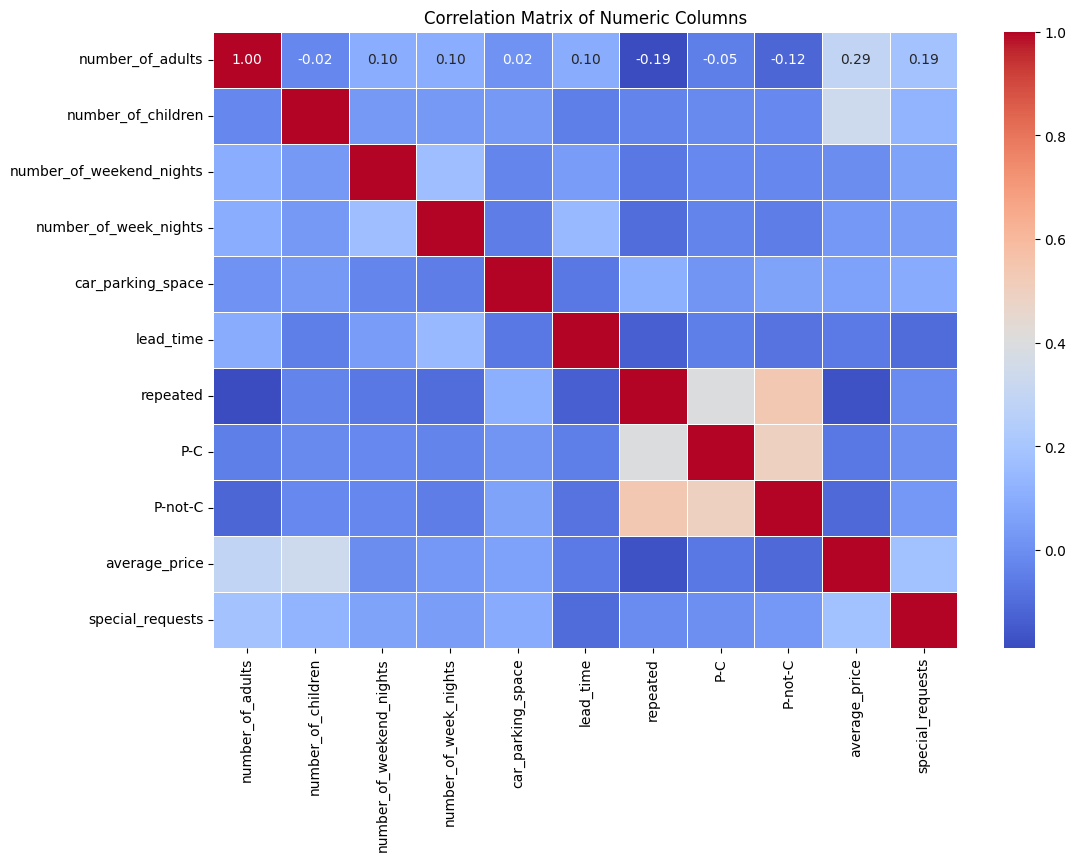

In [17]:
numeric_columns = train.select_dtypes(include=np.number).columns
correlation_matrix = train[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

